In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.utils import shuffle

In [0]:
x_train = np.memmap('drive/My Drive/Xtrain.dat', shape=(600000, 2351), dtype=np.float32)
y_train = np.memmap('drive/My Drive/Ytrain.dat', dtype=np.float32)
# 0 for benign (nb of elm => 300000)
# 1 for malicious (nb of elm => 300000)

In [0]:
# normalization
std_scaler = preprocessing.StandardScaler()
x_train = std_scaler.fit_transform(x_train)

In [0]:
# shuffle the dataset
x_train, y_train = shuffle(x_train, y_train)

In [6]:
# split the data into two parts (training set and test set)
x_train, x_test = x_train[:550000], x_train[550000:]
y_train, y_test = y_train[:550000], y_train[550000:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(550000, 2351)
(550000,)
(50000, 2351)
(50000,)


In [7]:
# create validation set
x_validation, y_validation = x_train[500000:], y_train[500000:]
print(x_validation.shape)
print(y_validation.shape)

(50000, 2351)
(50000,)


In [0]:
# nbr of iteration
it = 10
# size of one batch
batch_size = 10000
# nbr of batch
nb_batch = 500000 // batch_size

In [0]:
# graphical representation of the data
def get_col(x_train, y_train, col_nbr, label, nbr_value):
  '''
  get one column of the dataset and represent it as a vector
  col_nbr: nbr of the column to process
  label: nbr of the label to get
  '''
  new = np.zeros((nbr_value, 1))
  cpt = 0
  i = 0
  while (nbr_value > 0):
    if y_train[i] == label:
      new[cpt] = x_train[i][col_nbr]
      cpt += 1
      nbr_value -= 1
    i += 1
  return new

In [0]:
# graphical representation of each point according to specific feature
def display(feature1, feature2):
  '''
  feature1: position of the feature 1 [0, 2350]
  feature2: pos of the feature 2 (in x_train)
  '''
  mal_1 = get_col(x_train, y_train, feature1, 1, 100)
  mal_2 = get_col(x_train, y_train, feature2, 1, 100)

  ben_1 = get_col(x_train, y_train, feature1, 0, 100)
  ben_2 = get_col(x_train, y_train, feature2, 0, 100)

  # display
  plt.scatter(mal_1, mal_2, marker='+', color='green')
  plt.scatter(ben_1, ben_2, marker='_', color='red')
  x_title = "feature nbr " + str(feature1)
  y_title = "feature nbr " + str(feature2)
  plt.xlabel(x_title)
  plt.ylabel(y_title)
  plt.show()

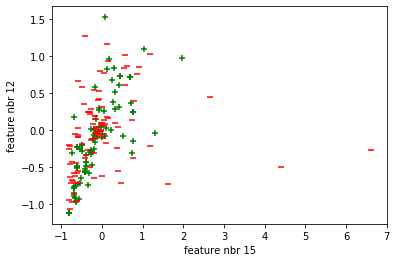

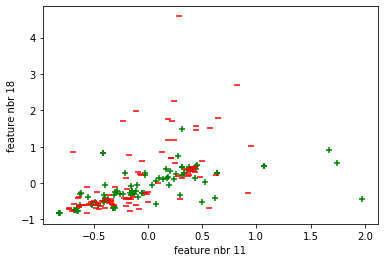

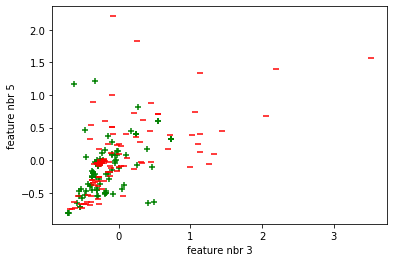

In [11]:
display(15, 12)
display(11, 18)
display(3, 5)

In [0]:
def predict_model(datas, labels, model):
  '''
  predict according to our model
  '''
  m = len(datas) # total nbr of data
  good_pred = 0 # nbr of good prediction
  for i in range(m):
    res = model.predict(np.array([datas[i]]))[0] # get the result
    label = labels[i]
    if res == label:
      good_pred += 1
  return good_pred / m

In [0]:
# create the model
# loss = 'log' <=> to logistic regression
model = linear_model.SGDClassifier(shuffle=True, loss='log')

In [16]:
# fit the model
for i in range(it):
  print("Epoch nbr {}".format(i + 1))
  inf = 0
  supp = 10000
  for j in range(nb_batch):
    print("=", end='')
    x_train_sub, y_train_sub = x_train[inf:supp], y_train[inf:supp]
    model.partial_fit(x_train_sub, y_train_sub, classes=np.unique(y_train))
    inf += batch_size
    supp += batch_size
  print()
  # validation set
  acc_val = predict_model(x_validation, y_validation, model)
  print("validation accuracy: {}".format(acc_val))
  print('--------------------')
  print('--------------------')

Epoch nbr 1
validation accuracy: 0.95488
--------------------
--------------------
Epoch nbr 2
validation accuracy: 0.95824
--------------------
--------------------
Epoch nbr 3
validation accuracy: 0.9598
--------------------
--------------------
Epoch nbr 4
validation accuracy: 0.95442
--------------------
--------------------
Epoch nbr 5
validation accuracy: 0.95934
--------------------
--------------------
Epoch nbr 6
validation accuracy: 0.96072
--------------------
--------------------
Epoch nbr 7
validation accuracy: 0.95838
--------------------
--------------------
Epoch nbr 8
validation accuracy: 0.96376
--------------------
--------------------
Epoch nbr 9
validation accuracy: 0.96288
--------------------
--------------------
Epoch nbr 10
validation accuracy: 0.96454
--------------------
--------------------


In [0]:
acc = predict_model(x_test, y_test, model)

In [18]:
print(acc)

0.96342
